In [2]:
from pandas import read_csv
from numpy import dstack
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed,MaxPooling1D,Conv1D,Flatten,Dropout,ConvLSTM2D,Dense,LSTM
from tensorflow.keras.regularizers import l1,l2,l1_l2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [3]:
%store -r X_train
%store -r X_val
%store -r X_test
%store -r y_train
%store -r y_val
%store -r y_test


In [4]:
trainX=X_train
trainy=y_train
valX=X_val
valy=y_val
testX=X_test
testy=y_test

In [5]:
trainX.shape

(47, 100, 17)

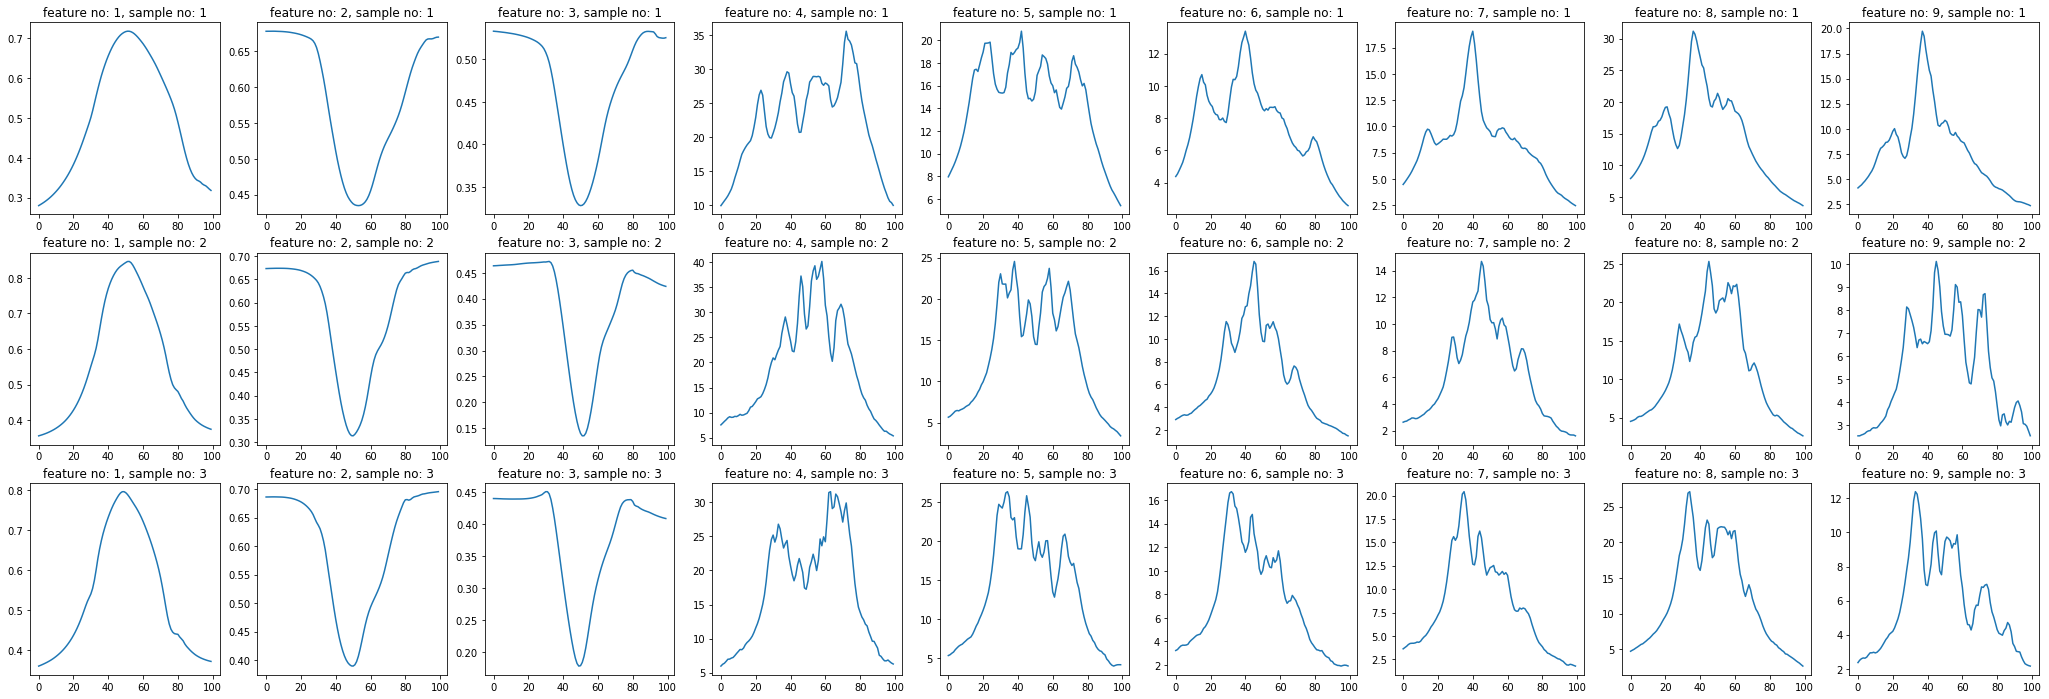

In [6]:
features=9
samples=3
movement_num=0

trainX_movement=np.array([trainX[i] for i in range(len(trainX)) if trainy[i][movement_num]==1])

m=features
n=samples
fig=plt.figure(figsize=(4*m,4*n))
k=0
for i in range(1,n+1):
    for j in range(1,m+1):
        k=k+1
        fig.add_subplot(n,m,k)
        plt.plot(trainX_movement[i-1,:,j-1])
        plt.title('feature no: %d, sample no: %d'%(j,i))
plt.show()

In [7]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

In [11]:
# fit and evaluate a model      ### changes n_steps, n_length = 4,32 -> 5,30 and remove reshape for testX

def evaluate_model(trainX, trainy,valX,valy, testX, testy):
	# define model
	verbose, epochs, batch_size = 1, 100, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# reshape into subsequences (samples, time steps, rows, cols, channels)
	n_steps, n_length = 4,25   ### differ from project
	trainX = trainX.reshape((trainX.shape[0], n_steps, 1, n_length, n_features))
	valX = valX.reshape((valX.shape[0], n_steps, 1, n_length, n_features))
	testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
#	model.add(Dropout(0.9))
	model.add(Flatten())
	model.add(Dense(200, activation='relu',activity_regularizer=l2(0.5)))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	history=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,validation_data=(valX,valy))
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return history,accuracy

In [12]:
history,accuracy=evaluate_model(trainX, trainy,valX,valy, testX, testy)
print('test_acc :',accuracy)


W1006 18:17:54.230064 15376 deprecation.py:506] From C:\Users\Udith\anaconda_\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 47 samples, validate on 10 samples


W1006 18:17:55.150065 15376 deprecation.py:323] From C:\Users\Udith\anaconda_\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
47/47 [==============================] - 1s 28ms/sample - loss: 1672.8795 - acc: 0.1489 - val_loss: 394.4339 - val_acc: 0.1000
Epoch 2/100
47/47 [==============================] - 0s 3ms/sample - loss: 416.9921 - acc: 0.1064 - val_loss: 128.6479 - val_acc: 0.1000
Epoch 3/100
47/47 [==============================] - 0s 3ms/sample - loss: 122.6416 - acc: 0.2128 - val_loss: 44.2680 - val_acc: 0.2000
Epoch 4/100
47/47 [==============================] - 0s 3ms/sample - loss: 38.3119 - acc: 0.1915 - val_loss: 18.0646 - val_acc: 0.2000
Epoch 5/100
47/47 [==============================] - 0s 4ms/sample - loss: 14.1701 - acc: 0.1064 - val_loss: 8.3383 - val_acc: 0.2000
Epoch 6/100
47/47 [==============================] - 0s 4ms/sample - loss: 6.2996 - acc: 0.1702 - val_loss: 4.3456 - val_acc: 0.2000
Epoch 7/100
47/47 [==============================] - 0s 4ms/sample - loss: 3.2800 - acc: 0.1702 - val_loss: 2.8206 - val_acc: 0.2000
Epoch 8/100
47/47 [==============================] - 

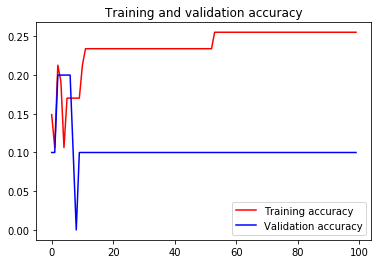

In [13]:
plot_num=33
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig=plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
name='E:/ML_projects/Human_activities_identifying/figs/%d_acc-%2f val_acc-%2f.png'%(plot_num,acc[-1],val_acc[-1])
#fig.savefig(name)


plt.show()